In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sign-language-mnist


In [2]:
import os

input_path = '/kaggle/input/sign-language-mnist'
print(os.listdir(input_path))

['sign_mnist_test.csv', 'sign_mnist_test', 'sign_mnist_train', 'amer_sign2.png', 'amer_sign3.png', 'sign_mnist_train.csv', 'american_sign_language.PNG']


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [5]:
train_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')
print(train_df.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [6]:
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)  
X_test = X_test.reshape(-1, 28, 28, 1)

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 25)
y_val = to_categorical(y_val, 25)
y_test = to_categorical(y_test, 25)

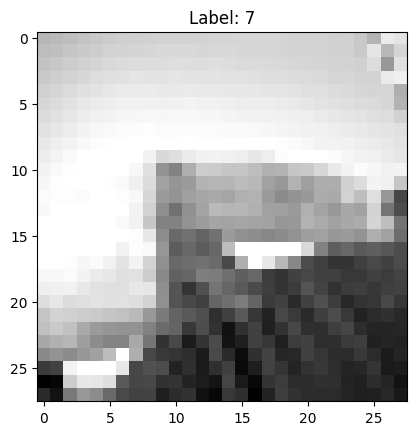

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f'Label: {np.argmax(y_train[0])}')
plt.show()

In [13]:
print(f'Number of training images: {X_train.shape[0]}')
print(f'Number of validation images: {X_val.shape[0]}')
print(f'Number of test images: {X_test.shape[0]}')

Number of training images: 24709
Number of validation images: 2746
Number of test images: 7172


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, Reshape
from tensorflow.keras.optimizers import Adam

In [29]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [30]:
model.add(Flatten())

In [31]:
model.add(Reshape((1, model.output_shape[1])))  
model.add(LSTM(128, activation='relu', return_sequences=False))

In [32]:
model.add(Dense(25, activation='softmax'))

In [33]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 1, 1600)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         885,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 907,289 (3.46 MB)

 Trainable params: 907,289 (3.46 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
epochs = 20  
batch_size = 32

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [28]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping]
)

Epoch 1/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 8.5678e-08 - val_accuracy: 1.0000 - val_loss: 6.3979e-06
Epoch 2/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9847 - val_loss: 0.0434
Epoch 3/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9984 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 2.2577e-04
Epoch 4/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 8.0796e-05 - val_accuracy: 1.0000 - val_loss: 1.4946e-04
Epoch 5/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 3.8896e-05 - val_accuracy: 1.0000 - val_loss: 1.0662e-04
Epoch 6/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 2.3374e-05 - val_accuracy: 1.0000 - val_loss: 7.9106e-05


In [29]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
class_labels =['sign_mnist_test.csv', 'sign_mnist_test', 'sign_mnist_train', 'amer_sign2.png', 'amer_sign3.png', 'sign_mnist_train.csv', 'american_sign_language.PNG']

In [31]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [33]:
accuracy = accuracy_score(y_true, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 94.31%


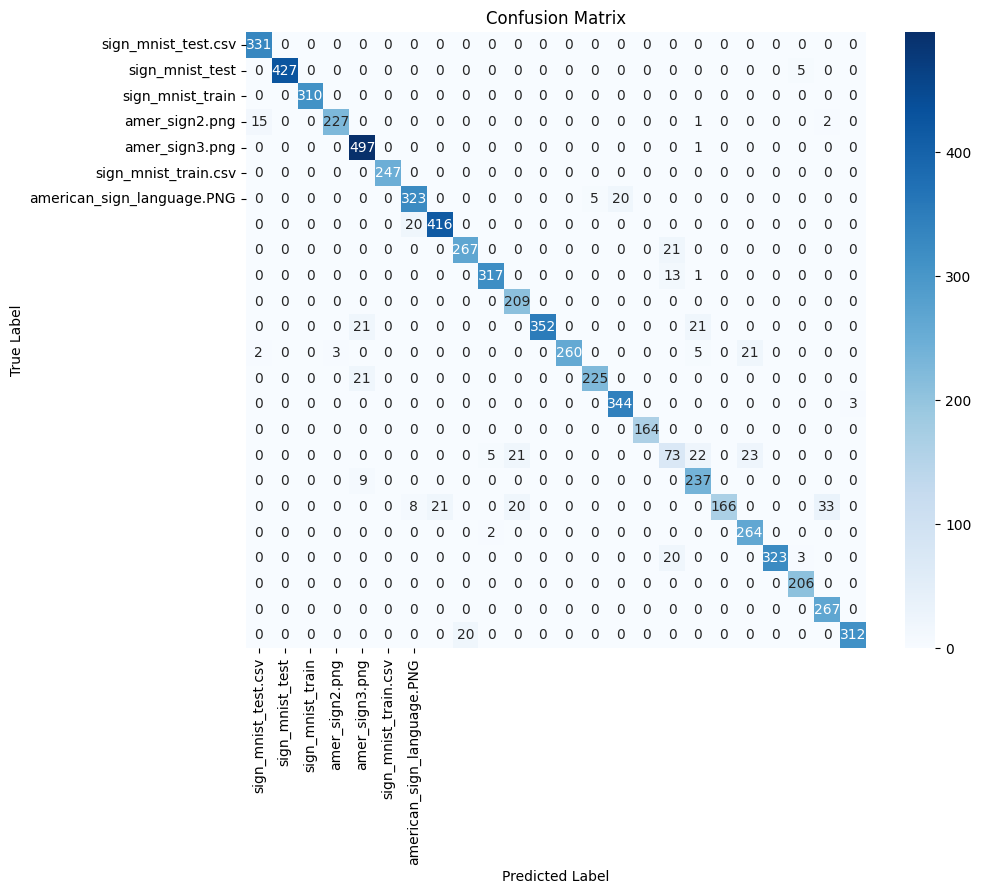

In [34]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

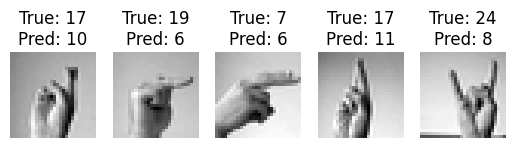

In [40]:
for i, idx in enumerate(misclassified_idx[:num_misclassified]):
    plt.subplot(1, num_misclassified, i + 1)
    image_shape = X_test.shape[1:3]
    plt.imshow(X_test[idx].reshape(image_shape), cmap='gray')
    true_label = y_true[idx]
    pred_label = y_pred[idx]
    if true_label < len(class_labels) and pred_label < len(class_labels):
        plt.title(f"True: {class_labels[true_label]}\nPred: {class_labels[pred_label]}")
    else:
        plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis("off")

plt.show()